This repository contains code for training a U-Net model for semantic segmentation. The model is trained on a dataset of images with corresponding annotations.

### Installation

To run the code, you need to install the following dependencies:

- TensorFlow
- Keras
- OpenCV
- NumPy
- Matplotlib

You can install these dependencies by running the following command:

In [1]:
import json
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
# from tensorflow.keras.utils import to_categorical
from matplotlib.colors import ListedColormap

# Load classification labels
with open('tmp/classification_labels.csv', 'r') as f:
    image_list = [line.strip() for line in f]

# Load annotations
with open('tmp/labels.json', 'r') as f:
    annotations = json.load(f)

def load_image(image_path):
    return cv2.imread(image_path)

images = []
labels = []

for item in annotations:
    image_path = os.path.join('tmp/images', item['name'])
    image = load_image(image_path)
    images.append(image)
    labels.append(item)

# Visualize some images with annotations
def visualize_image_with_annotations(image, annotations):
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    color_map = ListedColormap(plt.cm.hsv(np.linspace(0, 1, len(annotations['polygonGroups']))))
    
    for i, polygon_group in enumerate(annotations['polygonGroups']):
        for polygon in polygon_group['polygons']:
            points = np.array([[p['x'], p['y']] for p in polygon['points']])
            plt.fill(points[:, 0], points[:, 1], color=color_map(i), alpha=0.4)
            plt.plot(points[:, 0], points[:, 1], 'r-', linewidth=2)
            
            centroid = points.mean(axis=0)
            plt.text(centroid[0], centroid[1], polygon_group['label'], color='white', fontsize=10, ha='center')
    
    plt.title(annotations['name'])
    plt.show()


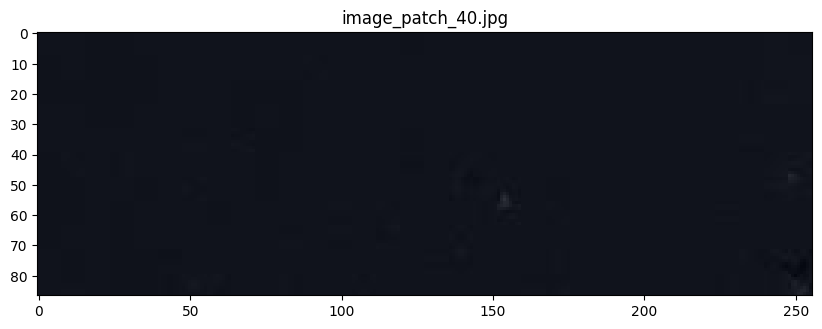

In [2]:
# Show a few images with annotations
for i in range(9, 10):
    visualize_image_with_annotations(images[i], labels[i])

In [3]:
label_map = {'BuildUp Area': 0, 'Building': 1, 'Water': 2, 'Vegetation': 3, 'Forest': 4, 'Road': 5}

def preprocess_image(image, target_size):
    return cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

def preprocess_labels(labels, target_size, num_classes, image):
    mask = np.zeros(target_size + (num_classes,), dtype=np.uint8)
    
    image_size = image.shape[:2]
            
    for polygon_group in labels['polygonGroups']:
        label_idx = label_map[polygon_group['label']]
        temp_mask = np.zeros(target_size, dtype=np.uint8)
        for polygon in polygon_group['polygons']:
            print(polygon_group['label'])
            points = np.array([[p['x'] * target_size[1] / image_size[1], p['y'] * target_size[0] / image_size[0]] for p in polygon['points']], dtype=np.int32)
            cv2.fillPoly(temp_mask, [points], 1)
        mask[:, :, label_idx] += temp_mask
    
    return mask

target_size = (256, 256)  # Example target size
num_classes = 6  # Number of classes

processed_images = np.array([preprocess_image(img, target_size) for img in images])
processed_labels = np.array([preprocess_labels(lbl, target_size, num_classes, img) for img, lbl in zip(images, labels)])

# import matplotlib.colors as mcolors
# # Visualize preprocessed images and labels
# def visualize_preprocessed_data(image, label):
# 
#     plt.figure(figsize=(18, 6))
#     
#     # Original Image
#     plt.subplot(1, 3, 1)
#     plt.imshow(image)
#     plt.title('Original Image')
#     
#     # Preprocessed Image
#     plt.subplot(1, 3, 2)
#     plt.imshow(cv2.resize(image, target_size, interpolation=cv2.INTER_AREA))
#     plt.title('Preprocessed Image')
#     
#     # Preprocessed Label
#     plt.subplot(1, 3, 3)
#     
#     # Create a custom color map
#     cmap = mcolors.ListedColormap(['red', 'blue', 'green', 'brown', 'gray'])
#     plt.imshow(np.argmax(label, axis=-1), cmap=cmap)
#     plt.title('Preprocessed Label')
#     plt.colorbar(ticks=[0,1,2,3,4], format=plt.FuncFormatter(lambda val, loc: list(label_map.keys())[val]))
#     
#     plt.show()
# 
# # Show a few preprocessed images and labels
# for i in range(10, 13):
#     visualize_preprocessed_data(images[i], processed_labels[i])

------------------------------------------------------------
Forest
Forest
BuildUp Area
Vegetation
------------------------------------------------------------
Forest
BuildUp Area
Vegetation
BuildUp Area
BuildUp Area
------------------------------------------------------------
BuildUp Area
Forest
Forest
Forest
Forest
Vegetation
------------------------------------------------------------
BuildUp Area
Vegetation
Building
Forest
Forest
------------------------------------------------------------
Water
Water
BuildUp Area
Vegetation
Vegetation
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
BuildUp Area
Forest
Vegetation
Forest
Forest
BuildUp Area
Forest
-----------------------

In [4]:
processed_labels[0].shape

(256, 256, 6)

In [5]:
processed_images[0].shape

(256, 256, 3)

In [6]:
i = 0

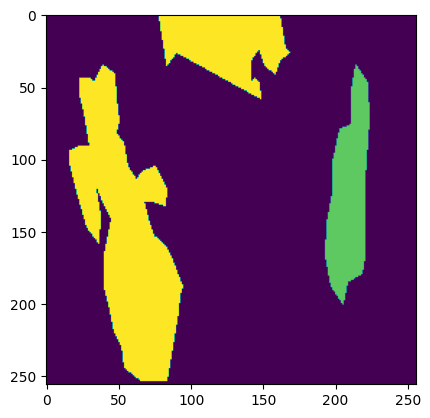

In [7]:
plt.imshow(np.argmax(processed_labels[i], axis=-1))
plt.show()

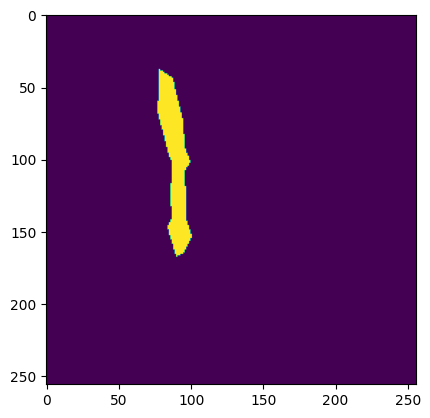

In [8]:
plt.imshow(processed_labels[i][:,:,0])
plt.show()

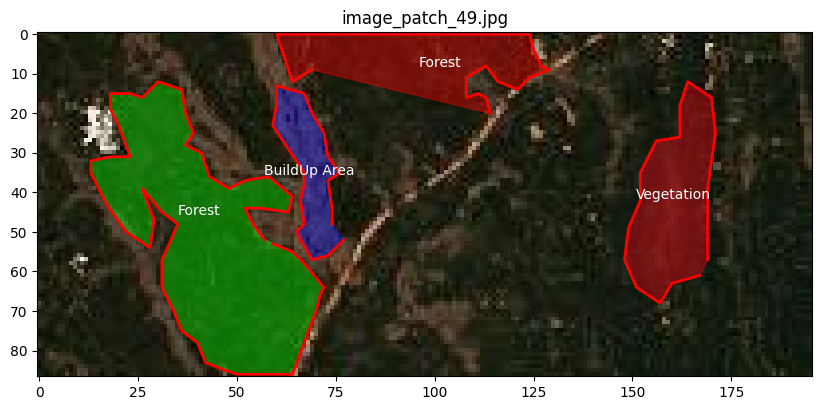

In [9]:
visualize_image_with_annotations(images[i], annotations[i])

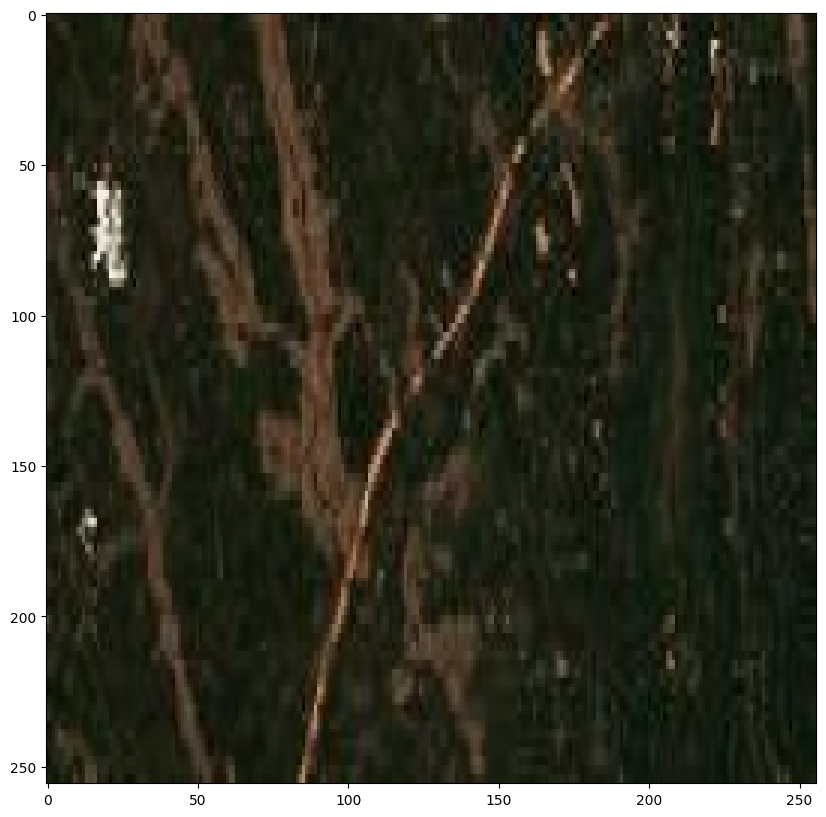

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(processed_images[i], cv2.COLOR_BGR2RGB))

In [11]:
import os

import cv2


input_dir = './tmp/masks'
output_dir = './tmp/labels'

# load the binary mask and get its contours
mask = processed_labels[0][:, :, 0]
_, mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

H, W = mask.shape[:2]
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# convert the contours to polygons
polygons = []
for cnt in contours:
    if cv2.contourArea(cnt) > 200:
        polygon = []
        for point in cnt:
            x, y = point[0]
            polygon.append(x / W)
            polygon.append(y / H)
        polygons.append(polygon)

print(polygons)

[]
